<a href="https://colab.research.google.com/github/TeamHub2/Machine-Learning/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/drive/MyDrive/Gold price prediction/gld_price_data.csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,NaN


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        2
GLD        2
USO        1
SLV        3
EUR/USD    2
dtype: int64

In [ ]:
#Handle all the missing data
gold_data['SPX']=gold_data['SPX'].fillna(gold_data['SPX'].mean())
gold_data['GLD']=gold_data['GLD'].fillna(gold_data['GLD'].mean())
gold_data['USO']=gold_data['USO'].fillna(gold_data['USO'].mean())
gold_data['SLV']=gold_data['SLV'].fillna(gold_data['SLV'].mean())
gold_data['EUR/USD']=gold_data['EUR/USD'].fillna(gold_data['EUR/USD'].mean())

In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

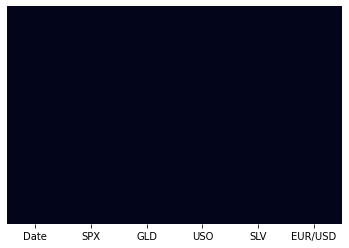

In [ ]:
sns.heatmap(gold_data.isnull(),yticklabels=False,cbar=False)

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.570331,122.748262,31.823694,20.090884,1.283572
std,519.038894,23.271046,19.503376,7.090693,0.131410
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.744999,14.380000,15.570000,1.171313
50%,1552.054993,120.584999,33.865000,17.290001,1.303271
75%,2073.010070,132.840004,37.820000,22.882499,1.369830
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1.Positive Correlation
2.Negative Correlation

In [ ]:
correlation = gold_data.corr()

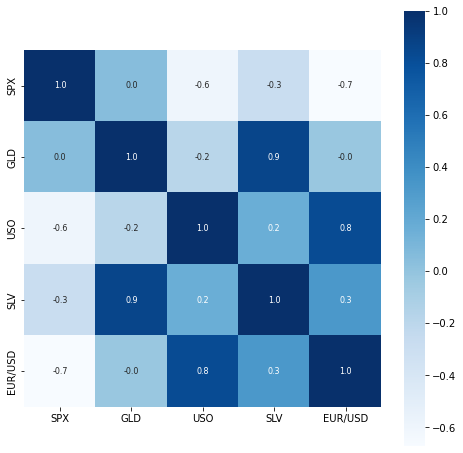

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.048288
GLD        1.000000
USO       -0.183766
SLV        0.866514
EUR/USD   -0.022040
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


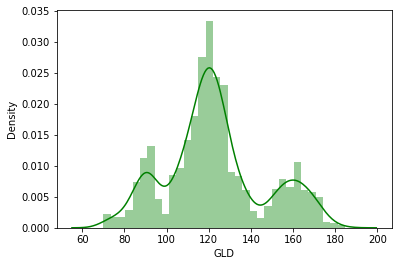

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
print(X)
                   

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.283572
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
Y=gold_data['GLD']
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Data Normalization

In [ ]:
#MinMaxScaler
from sklearn.preprocessing import StandardScaler
scalling=StandardScaler()
Y_scalled_gold_data=scalling.fit_transform(gold_data[['GLD']])
Y_scalled_gold_data

array([[-1.62848445],
       [-1.59796781],
       [-1.61687968],
       ...,
       [ 0.10451911],
       [ 0.07486196],
       [-0.00878804]])

In [ ]:
#MinMaxScaler
from sklearn.preprocessing import StandardScaler
scalling=StandardScaler()
X_scalled_gold_data=scalling.fit_transform(X)
X_scalled_gold_data

array([[-0.39969182,  2.39222655, -0.69273301,  1.43186162],
       [-0.39969182,  2.38709821, -0.67792164,  1.45316603],
       [-0.46816027,  2.33273652, -0.6945668 ,  1.46078508],
       ...,
       [ 2.0590617 , -0.89305036, -0.61373899, -0.69887634],
       [ 2.07266638, -0.89458889, -0.63912993, -0.68848673],
       [ 2.06428396, -0.89326576, -0.65405416, -0.77285951]])

Splitting the Features and Target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scalled_gold_data,Y_scalled_gold_data,test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
# training the model
regressor.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor()

In [ ]:
regressor.score(X_test,Y_test)

0.9891103044634848

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[0.85879137 0.10440789 0.40279782 0.50144343 0.44140242 0.73945982
 0.69923031 0.48858715 0.41422899 0.48848665 0.40568027 0.88546125
 0.62353871 0.85472033 0.39469414 0.41437562 0.59758535 0.87528846
 0.78423777 0.78646656 0.74355444 0.48503274 0.91986476 0.76160578
 0.48191031 0.20927219 0.07219042 0.44299242 0.42851471 0.85049745
 0.15953923 0.48118948 0.18412603 0.41714811 0.44640109 0.57909244
 0.39617596 0.39388779 0.67452136 0.32365042 0.29534692 0.14937864
 0.49346629 0.41987086 0.73245835 0.43241471 0.33647614 0.33193123
 0.20313816 0.50015184 0.04492452 0.38187452 0.44697794 0.35927743
 0.42721529 0.44096257 0.77208747 0.85997124 0.67288681 0.1371699
 0.21865563 0.14784623 0.17962476 0.42859239 0.49246271 0.50426653
 0.8790523  0.45640894 0.41317131 0.248972   0.85687673 0.6379466
 0.54318182 0.44637668 0.44211712 0.43335284 0.38760104 0.41900778
 0.32270357 0.50561396 0.3843407  0.31102715 0.41063184 0.43289642
 0.16711756 0.15897722 0.67023478 0.49806878 0.37956717 0.348360

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893834679579563


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

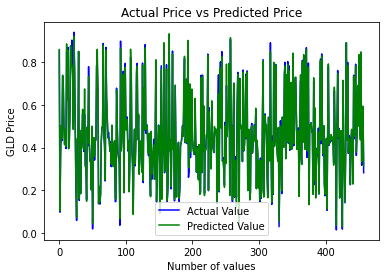

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Using DecisionTree